In [1]:
# This is for checking the calibration of parameters 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = '../../Data/CareerHistory/0133/0133_ver2.dat'
df = pd.read_csv(file, sep = '\t')

In [4]:
# Exclude Tokyo, Kanagawa, Osaka, Kyoto, Hyogo, Aichi 
df = df.loc[(df.q3 != 12) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21) & (df.q3 != 47)]

In [5]:
df

,sampleno,kyojuuchi,q1,q2,q3,q3_toshiruikei,q4_1,q4_2,q5_1,q5_2,...,q30_1_3,q30_1_4_dai,q30_1_4_shou,q30_1_5,q30_1_6,q31,q32,q32_1,q33,q33_1
0,1,10,53,1,10,4,4,3,3,3,...,44,4,66,8,1,2,99,998,99,998
1,2,10,61,1,10,4,4,3,3,3,...,13,97,997,8,98,2,99,998,99,998
2,3,10,49,1,10,4,6,3,1,1,...,13,97,997,8,98,7,99,998,99,998
3,4,10,69,1,10,4,9,6,6,6,...,13,97,997,8,98,1,99,998,99,998
4,5,10,45,1,10,4,4,1,3,1,...,48,4,66,8,2,6,99,998,99,998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,4217,47,56,2,50,7,4,2,2,2,...,13,97,997,8,98,2,4,998,4,998
4237,4238,47,29,2,35,3,3,2,2,2,...,13,97,997,8,98,7,6,998,6,998
4238,4239,47,49,2,46,4,6,6,4,4,...,45,8,251,1,5,6,4,998,3,998
4243,4244,47,31,2,44,3,6,5,4,3,...,13,97,997,8,98,7,5,998,5,998


In [6]:
# Exclude data with missing first job location
df = df.loc[(df.q15_3 != 50) & (df.q15_3 != 98) & (df.q15_3 != 99) &(df.q15_3 != 49)]

In [7]:
# Create columns for move history

In [8]:
df['moved_pref_first_job'] = 0
df.loc[df.q26_2 != df.q15_3, 'moved_pref_first_job'] = 1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/1724093637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moved_pref_first_job'] = 0
/Users/satoshi/miniconda3/envs/jpandas/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df['moved_within_pref_first_job'] = 0
df.loc[(df.q3 == df.q15_3) & (df.q3_toshiruikei != df.q15_3_toshiruikei), 'moved_within_pref_first_job'] = 1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/2816994642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moved_within_pref_first_job'] = 0


In [10]:
df['moved_first_job'] = df['moved_pref_first_job'] + df['moved_within_pref_first_job']

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/3329407535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moved_first_job'] = df['moved_pref_first_job'] + df['moved_within_pref_first_job']


In [11]:
year = 1981

In [12]:
df['birth_year'] = year - df.q1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/266042074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = year - df.q1


In [13]:
df['first_job_year'] = df['birth_year'] + df.q15_9_1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/827002645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_job_year'] = df['birth_year'] + df.q15_9_1


In [14]:
df['counts'] = 1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/3672233403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counts'] = 1


In [15]:
df['moved_pref'] = 0
df.loc[df.kyojuuchi != df.q3, 'moved_pref'] = 1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/2268962213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moved_pref'] = 0


In [16]:
# Create columns for educational attainment
df['new_middle'] = 0
df.loc[df.q26_1 == 7, 'new_middle'] = 1

df['new_high'] = 0
df.loc[df.q26_1 == 8, 'new_high'] = 1

df['new_junior_college'] = 0
df.loc[df.q26_1 == 9, 'new_junior_college'] = 1

df['new_college'] = 0
df.loc[df.q26_1 == 10, 'new_college'] = 1

df['old_elementary'] = 0
df.loc[df.q26_1 == 1, 'old_elementary'] = 1

df['old_upper_elementary'] = 0
df.loc[df.q26_1 == 2, 'old_upper_elementary'] = 1

df['old_vocational'] = 0
df.loc[df.q26_1 == 3, 'old_vocational'] = 1

df['old_middle'] = 0
df.loc[df.q26_1 == 4, 'old_middle'] = 1

df['old_high'] = 0
df.loc[df.q26_1 == 5, 'old_high'] = 1

df['old_college'] = 0
df.loc[df.q26_1 == 6, 'old_college'] = 1

df['high'] = df['new_high'] + df['old_high']

df['middle'] = df['new_middle'] + df['old_middle'] + df['old_vocational'] + df['old_upper_elementary']

df['college'] = df['new_college'] + df['old_college']

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/763782325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_middle'] = 0
/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/763782325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_high'] = 0
/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/763782325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [17]:
# Create columns for the job matching means for the first job
df['first_job_school'] = 0
df.loc[df.q15_8 == 3, 'first_job_school'] = 1

df['first_job_pub_emp'] = 0
df.loc[df.q15_8 == 4, 'first_job_pub_emp'] = 1

df['first_job_conn'] = 0
df.loc[df.q15_8 == 1, 'first_job_conn'] = 1
df.loc[df.q15_8 == 2, 'first_job_conn'] = 1

df['first_job_adv'] = 0
df.loc[df.q15_8 == 5, 'first_job_adv'] = 1

df['first_job_other'] = 0
df.loc[df.q15_8 == 6, 'first_job_other'] = 1

df['first_job_self'] = 0
df.loc[df.q15_8 == 7, 'first_job_self'] = 1

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/175030797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_job_school'] = 0
/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/175030797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_job_pub_emp'] = 0
/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_4350/175030797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [18]:
def plot_graphs(year_column, data_column, title, label1, label2, filename):
    
    _df = df[[year_column, data_column, 'counts']].copy()
    
    if year_column == 'first_job_year':
        _df = _df.loc[_df[year_column] <= 1975]
    
    _df_group = _df.groupby([year_column])[[data_column, 'counts']].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.rc('pgf', texsystem = 'pdflatex')
    
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax, label = label1,linestyle = '--',
               color = 'b',)
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax, label = label2, alpha = 0.7)
    
    fig.set_size_inches(w=6.26894, h=3.5)    
    plt.xlabel('year')
    

    plt.title(title)
    plt.savefig(filename)
    plt.show()

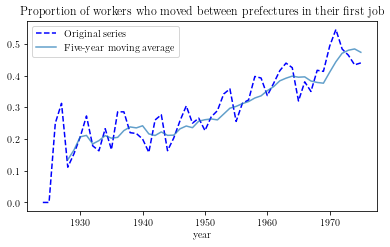

In [24]:
title = r'Proportion of workers who moved between prefectures in their first job'
legend1 = 'Original series'
legend2 = 'Five-year moving average'
filename = '../../Notes/Discussion/moved_pref_first_job2.pgf'
plot_graphs('first_job_year', 'moved_pref_first_job', title, legend1, legend2, filename)

In [27]:
def plot_graphs_subsample(year_column, data_column, subsample, title, label1, label2, filename):
    
    _df = df[[year_column, data_column, subsample,'counts']].copy()
    _df = _df.loc[_df[subsample] == 1,:]
    
    if year_column == 'first_job_year':
        _df = _df.loc[_df[year_column] <= 1975]
    
    _df_group = _df.groupby([year_column])[[data_column, 'counts']].sum().reset_index()
    _df_group['data_ratio'] = _df_group[data_column] / _df_group.counts
    _df_group['ratio_SMA_5'] = _df_group['data_ratio'].rolling(window = 5).mean()
    
    fig, ax = plt.subplots()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('pgf', texsystem = 'pdflatex')
    
    _df_group.plot(x = year_column, y = 'data_ratio', ax = ax, label = label1, color = 'b', linestyle = '--')
    _df_group.plot(x = year_column, y = 'ratio_SMA_5', ax = ax, label = label2, alpha = 0.7)
    
    fig.set_size_inches(w=6.26894, h=3.5)    
    plt.xlabel('year')
    
    plt.title(title)
    plt.savefig(filename)
    plt.show()

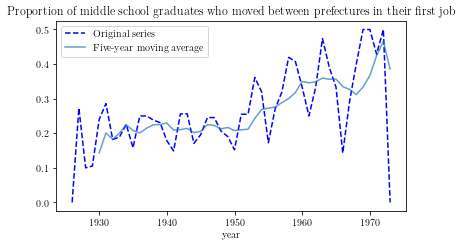

In [28]:
title = r'Proportion of middle school graduates who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'middle', title, label1, label2, filename)

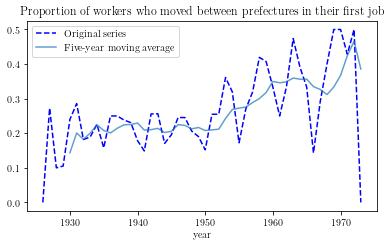

In [22]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_middle.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'middle', title, label1, label2, filename)

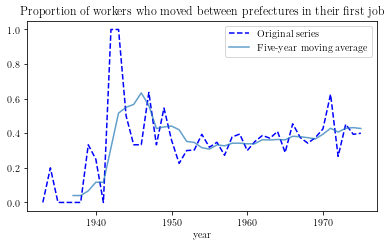

In [23]:
title = r'Proportion of workers who moved between prefectures in their first job'
label1 = 'Original series'
label2 = 'Five-year moving average'
filename = filename = '../../Notes/Discussion/moved_pref_first_job_high2.pgf'
plot_graphs_subsample('first_job_year', 'moved_pref_first_job', 'high', title, label1, label2, filename)